In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from IPython.display import clear_output
import albumentations as A

from dataset import *
from config import *
from utils import *
from models.model import UNet

Using cache found in /home/mkim/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


Using cache found in /home/mkim/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


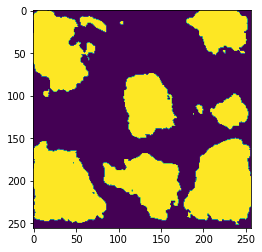

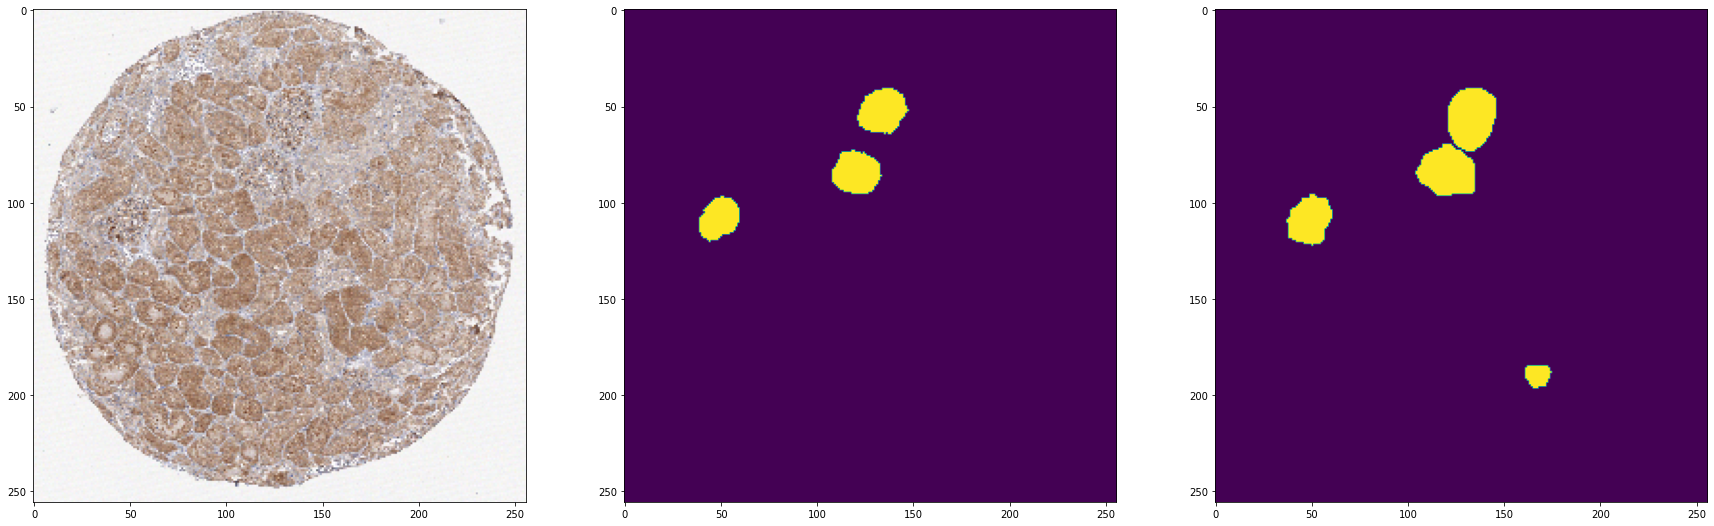

In [3]:
model = UNet(3, 1, init_features=32)
model.load_state_dict(torch.load('saved/models/model_1'))

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)
model.load_state_dict(torch.load('saved/models/model_2'))

model.to(DEVICE)
model.eval()

from utils import get_transforms, threshold_tensor, get_mask_highlight
means = np.array([212.1089, 205.7680, 210.4203]) / 255
stds = np.array([41.9276, 48.7806, 45.6515]) / 255
transform, test_transform, inv_normalize = get_transforms(means, stds, IMG_SIZE)

test_path = os.path.join("data/test_images/"+ '10078.tiff')
submission_img = plt.imread(test_path)

image = test_transform(image=submission_img)['image'].to(DEVICE).unsqueeze(0)
out = model(image).squeeze(1)
plt_img = inv_normalize(image=image[0].permute(1, 2, 0).cpu().numpy())['image']
plt_out = threshold_tensor(out).detach().cpu().numpy().astype(np.uint8)[0]
plt_mask = get_mask_highlight(plt_img, plt_out)

plt_img[plt_out == 1] = 1

plt.imshow(plt_img)

plt.imshow(plt_out)

train_loader, train_writer, \
        val_loader, val_writer, \
        test_loader, test_writer, \
        submission_writer       =   prepare(transform, test_transform, "saved/tensorboard/runs_1")

for i, data in enumerate(val_loader):
    image, mask = data['image'].to(DEVICE), data['mask'].to(DEVICE)
    out = model(image).squeeze(1)
    break


plt_imgs, plt_outs, plt_masks = format_tensors_plt(image, out, inv_normalize, mask=mask)

i = 3
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(plt_imgs[i])
axs[1].imshow(plt_outs[i])
axs[2].imshow(plt_masks[i])